In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dropout

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
retail_df=pd.read_csv('train_data.csv')
retail_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0
...,...,...,...,...,...,...,...,...,...
982639,1111,2,2013-01-01,0,0,0,0,a,1
982640,1112,2,2013-01-01,0,0,0,0,a,1
982641,1113,2,2013-01-01,0,0,0,0,a,1
982642,1114,2,2013-01-01,0,0,0,0,a,1


In [3]:
retail_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000,982644.000000
mean,558.444843,3.998282,5760.843202,632.770227,0.828585,0.380183,0.171928
std,321.909907,2.000138,3857.573443,465.401378,0.376871,0.485432,0.377318
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,3705.000000,403.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5731.000000,609.000000,1.000000,0.000000,0.000000
75%,838.000000,6.000000,7847.000000,838.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000,1.000000


In [4]:
retail_df.shape

(982644, 9)

In [5]:
retail_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [6]:
retail_df.nunique()

Store             1115
DayOfWeek            7
Date               911
Sales            21642
Customers         4076
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [7]:
print(retail_df['StateHoliday'].dtypes)

object


In [8]:
retail_df['StateHoliday'] = retail_df['StateHoliday'].astype(str)

In [9]:
#converting date into datetime format
retail_df['Date']=pd.to_datetime(retail_df['Date'])

In [10]:
# Appling one hot encoding 
data_encoder=OneHotEncoder(sparse=False)
encoder_features = data_encoder.fit_transform(retail_df[['StateHoliday']])

In [11]:
# adding encoded features to dataframe
encoded_features_names=data_encoder.get_feature_names_out(['StateHoliday'])
retail_data_encoded = pd.concat([retail_df, pd.DataFrame(encoder_features, columns=encoded_features_names)], axis=1)
retail_data_encoded.drop(['StateHoliday'], axis=1, inplace=True)

In [12]:
retail_data_encoded

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2,2015-06-30,5735,568,1,1,0,1.0,0.0,0.0,0.0
1,2,2,2015-06-30,9863,877,1,1,0,1.0,0.0,0.0,0.0
2,3,2,2015-06-30,13261,1072,1,1,1,1.0,0.0,0.0,0.0
3,4,2,2015-06-30,13106,1488,1,1,0,1.0,0.0,0.0,0.0
4,5,2,2015-06-30,6635,645,1,1,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
982639,1111,2,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,0.0
982640,1112,2,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,0.0
982641,1113,2,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,0.0
982642,1114,2,2013-01-01,0,0,0,0,1,0.0,1.0,0.0,0.0


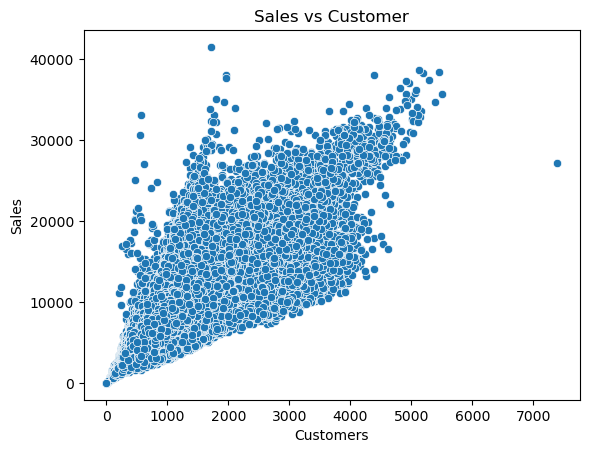

In [13]:
#EDA for creating the visualization and corrilation 

sns.scatterplot(x='Customers', y='Sales', data=retail_data_encoded)
plt.title('Sales vs Customer')
plt.show()

In [14]:
#applying train test split

x=retail_data_encoded.drop(['Sales','Date'], axis=1)
y=retail_data_encoded['Sales']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [15]:
## appling linear regration model for train
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [16]:
# Make predictions
y_pred = lr_model.predict(x_test)
y_pred

array([6665.98036451, 8232.63132897, 5956.25646119, ..., 7861.61405173,
       2389.66200149,  512.2972333 ])

In [17]:
#Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [18]:
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Root Mean Squared Error (RMSE): 1469.8750959962836
Mean Absolute Error (MAE): 973.7070641733485


In [19]:
lasso_model = Lasso(alpha=0.01)  
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [20]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(x_test)))

In [21]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(x_train,y_train)

Ridge()

In [22]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_model.predict(x_test)))

In [23]:
print(f'Lasso RMSE: {lasso_rmse}')
print(f'Ridge RMSE: {ridge_rmse}')

Lasso RMSE: 1469.8751903740313
Ridge RMSE: 1469.875108414682


In [24]:
# Creating a range of alpha values to search through a dictionary of hyperparameters to search
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = {'alpha': alphas}

# Initializing the Lasso regression model
lasso = Lasso()

# Performing grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# trying to get the best alpha value and model and training the best Lasso model on the full training set
best_alpha = grid_search.best_params_['alpha']
best_lasso_model = grid_search.best_estimator_
best_lasso_model.fit(x_train, y_train)

Lasso(alpha=0.001)

In [25]:
# Making predictions with the best model
lasso_predictions = best_lasso_model.predict(x_test)

# Calculate RMSE and MAE for the best Lasso model
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_mae = mean_absolute_error(y_test, lasso_predictions)

print(f'Best Lasso Model - Alpha: {best_alpha}')
print(f'Lasso RMSE: {lasso_rmse}')
print(f'Lasso MAE: {lasso_mae}')

Best Lasso Model - Alpha: 0.001
Lasso RMSE: 1469.8751040212915
Lasso MAE: 973.706660490803


In [26]:
# Initialize and train a Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Calculate RMSE and MAE for Random Forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)

print(f'Random Forest RMSE: {rf_rmse}')
print(f'Random Forest MAE: {rf_mae}')

Random Forest RMSE: 643.0184851029095
Random Forest MAE: 365.1348694671521


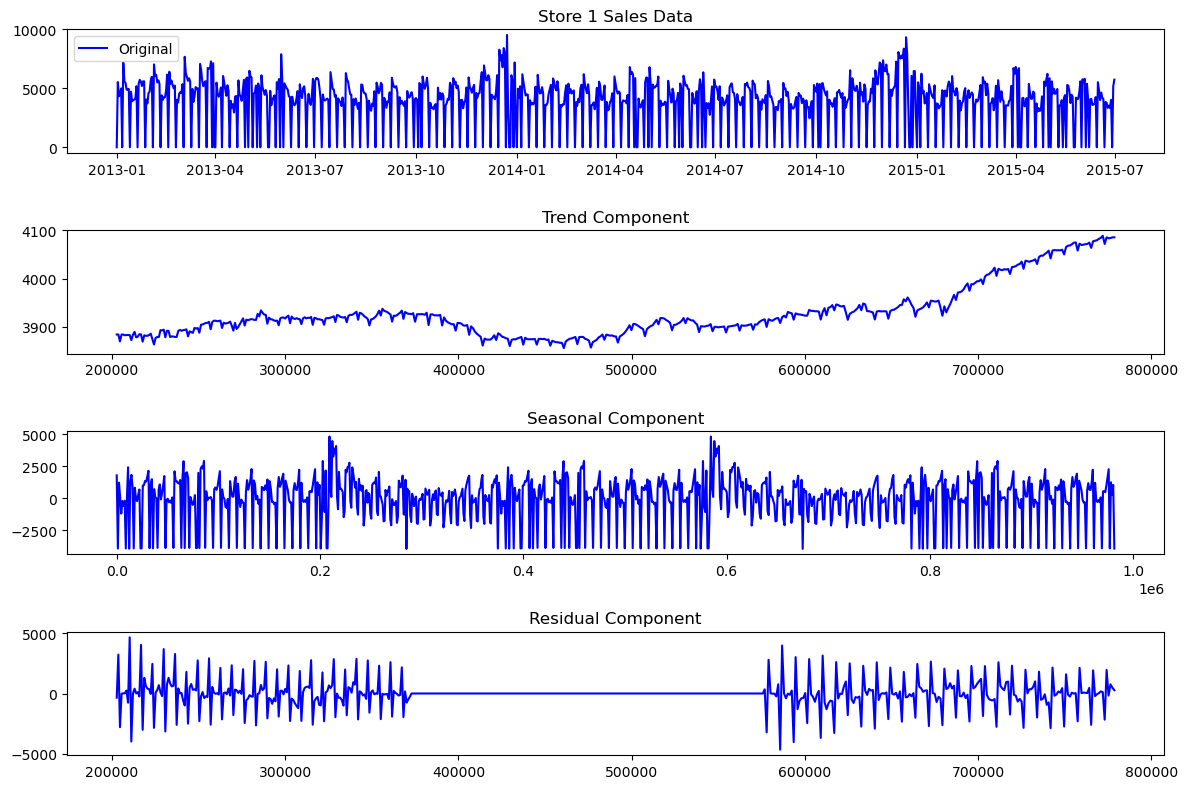

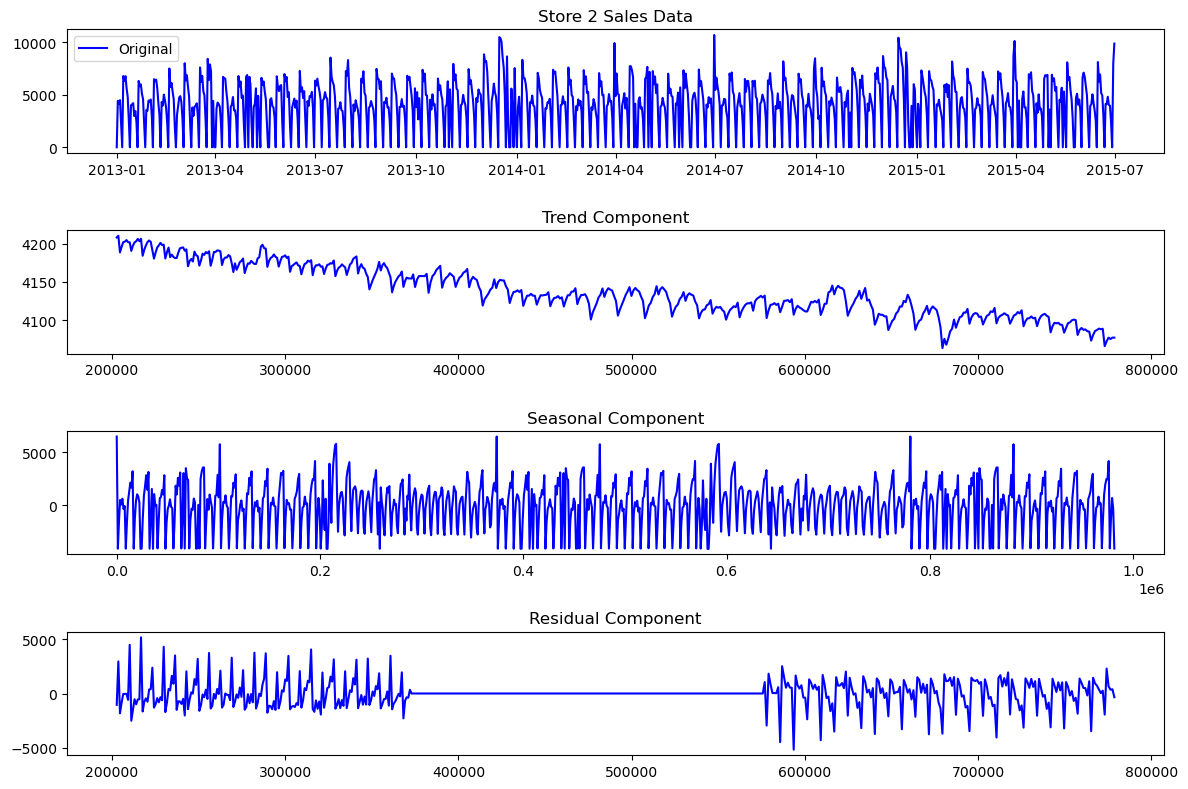

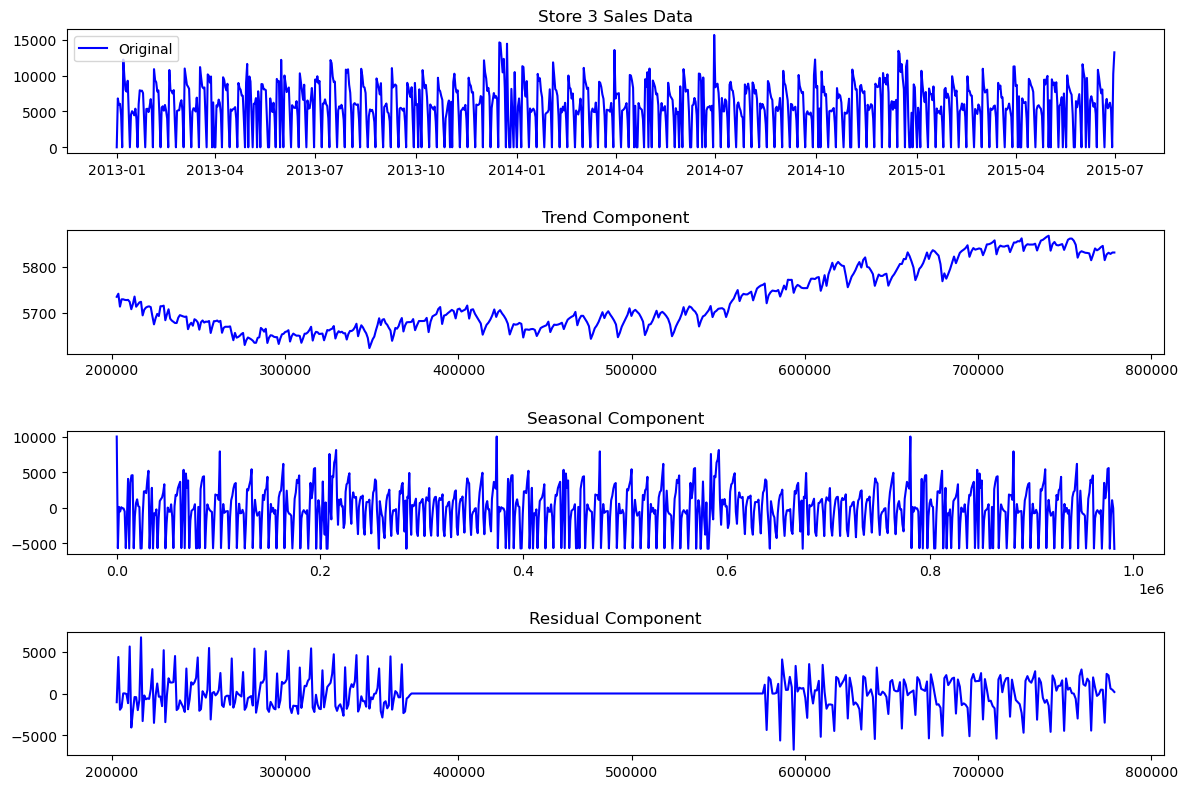

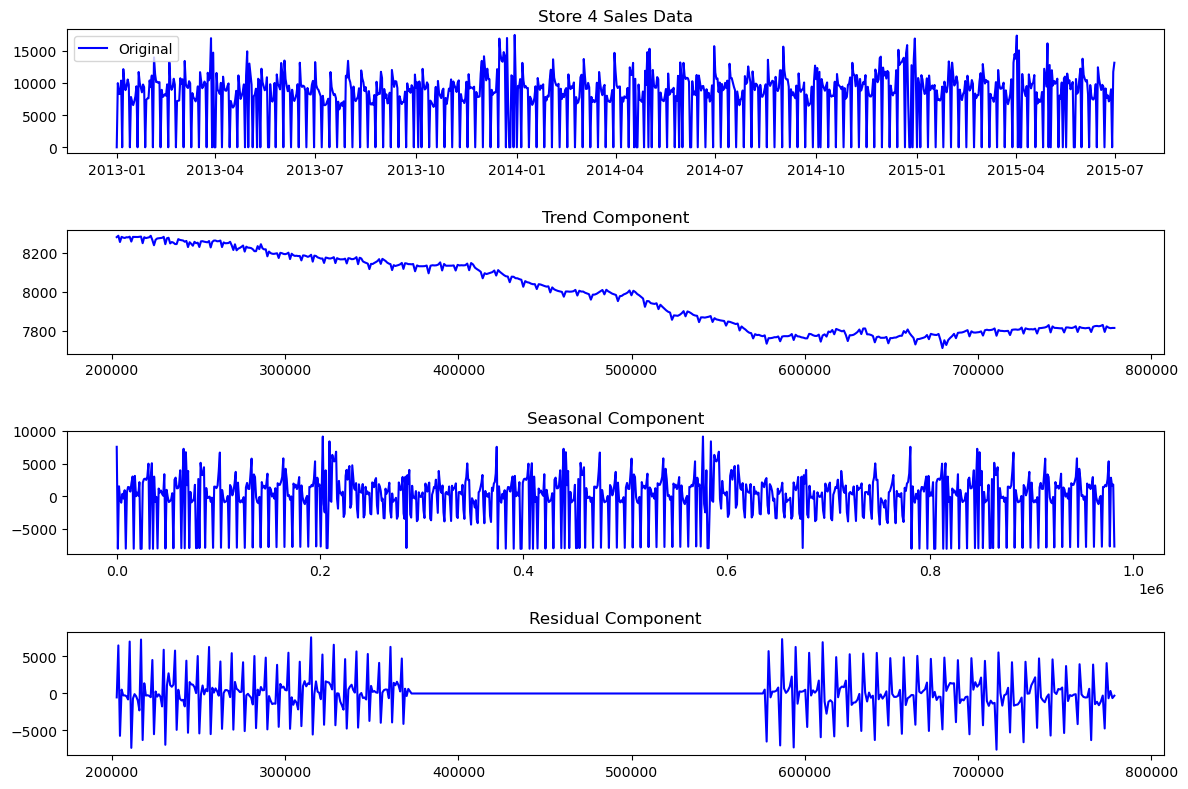

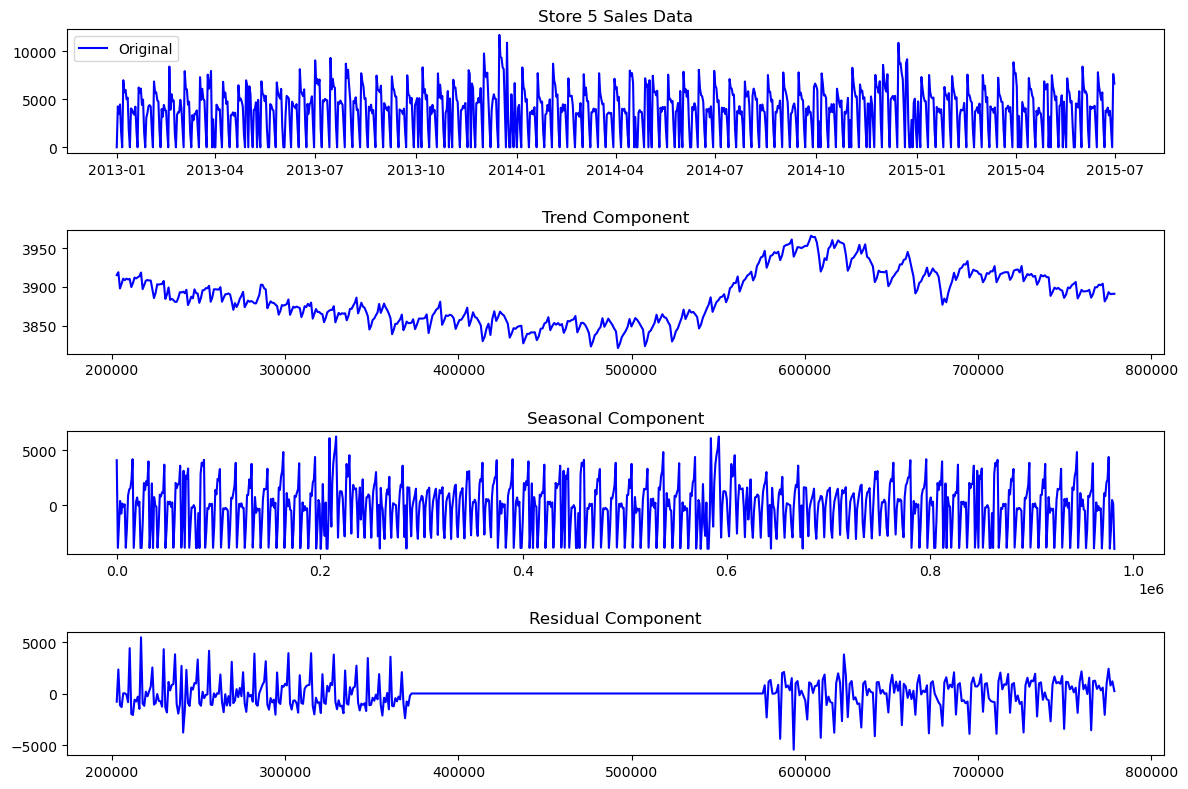

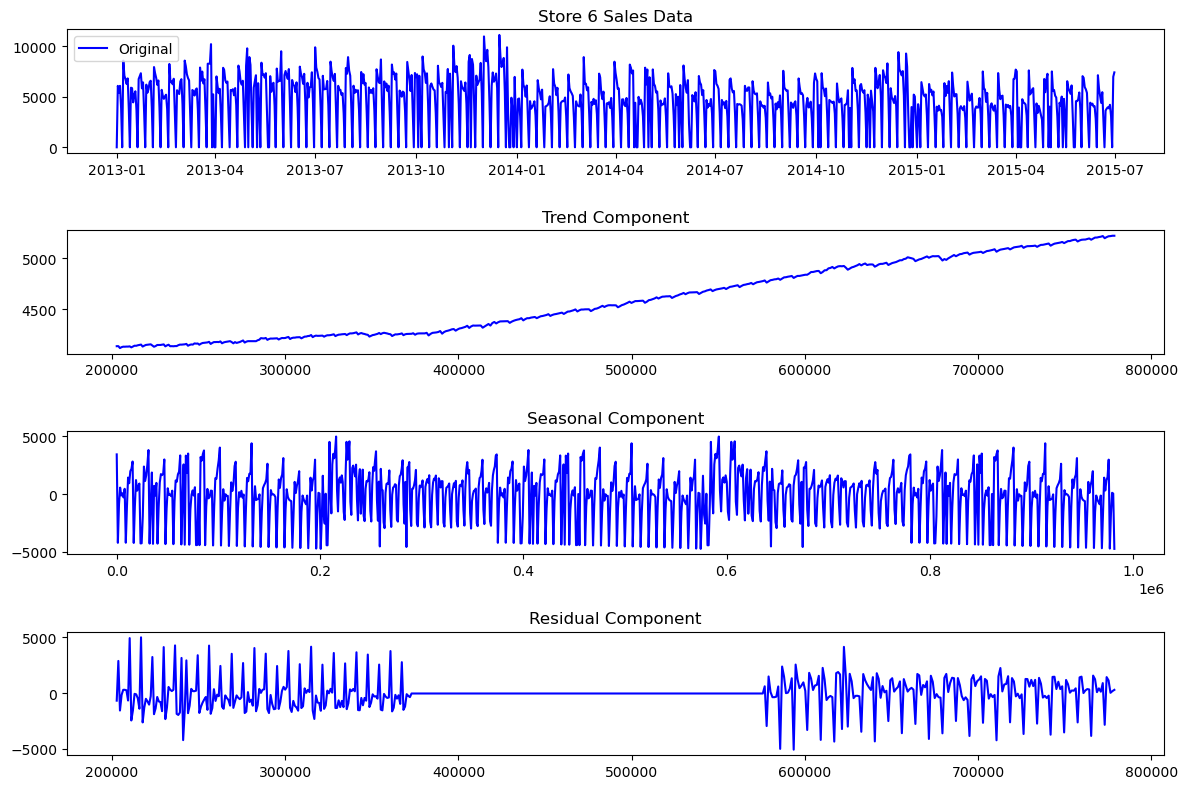

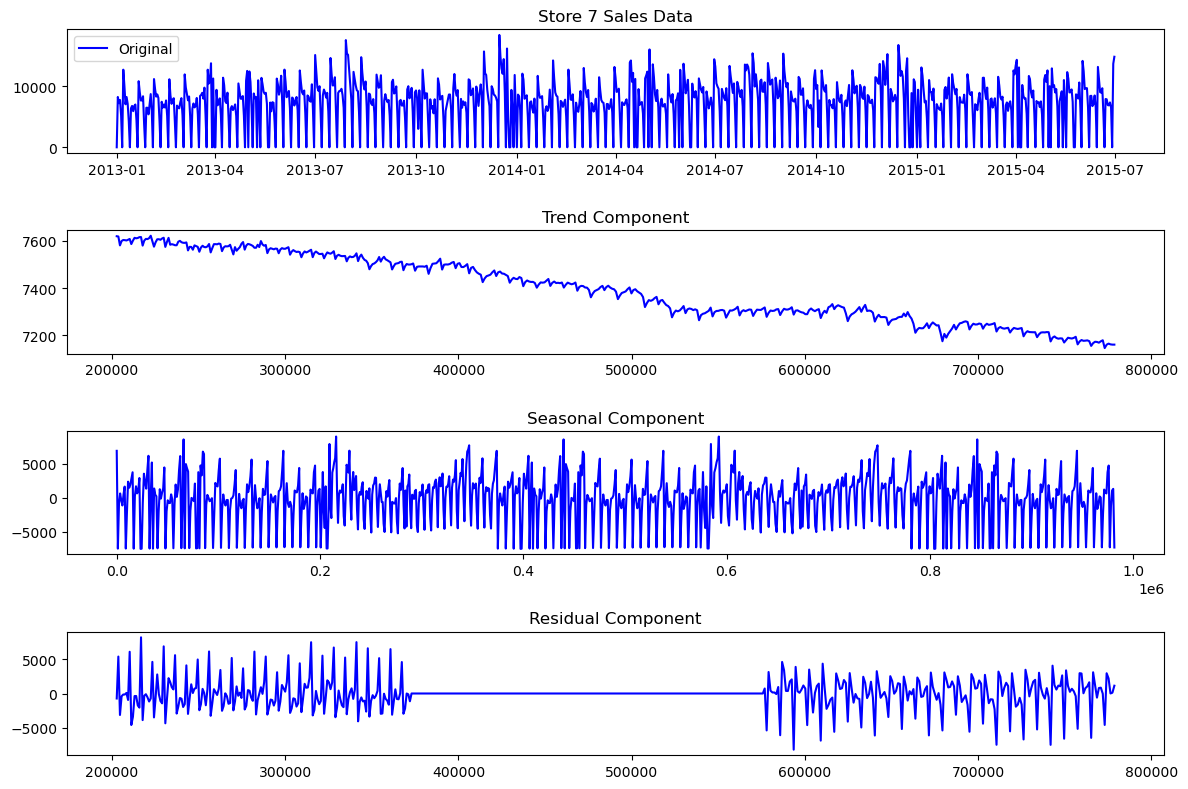

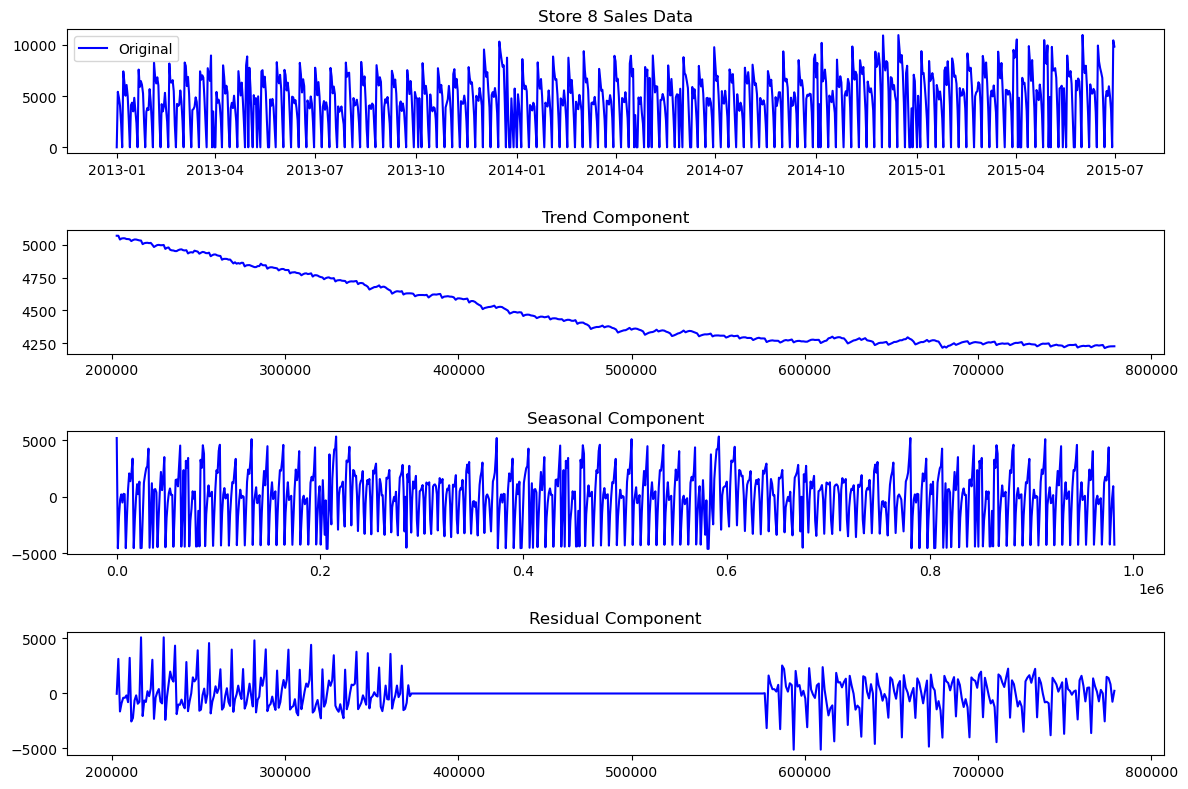

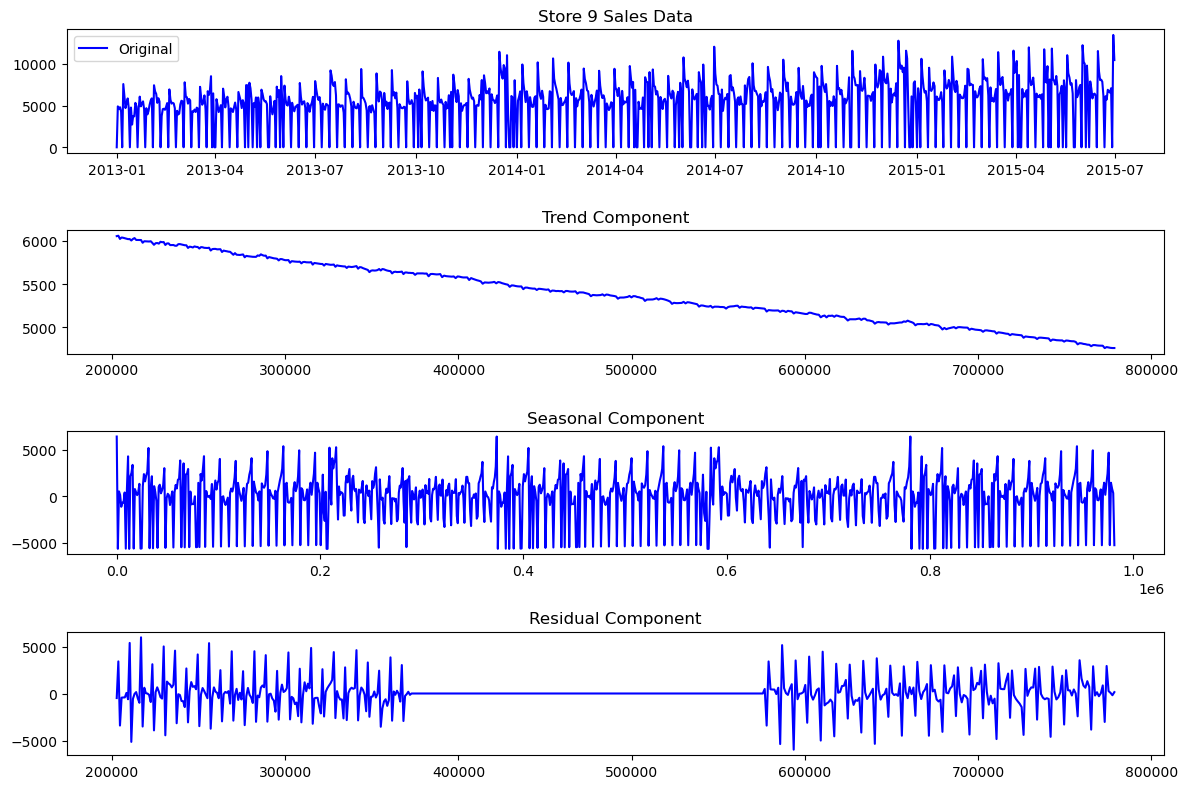

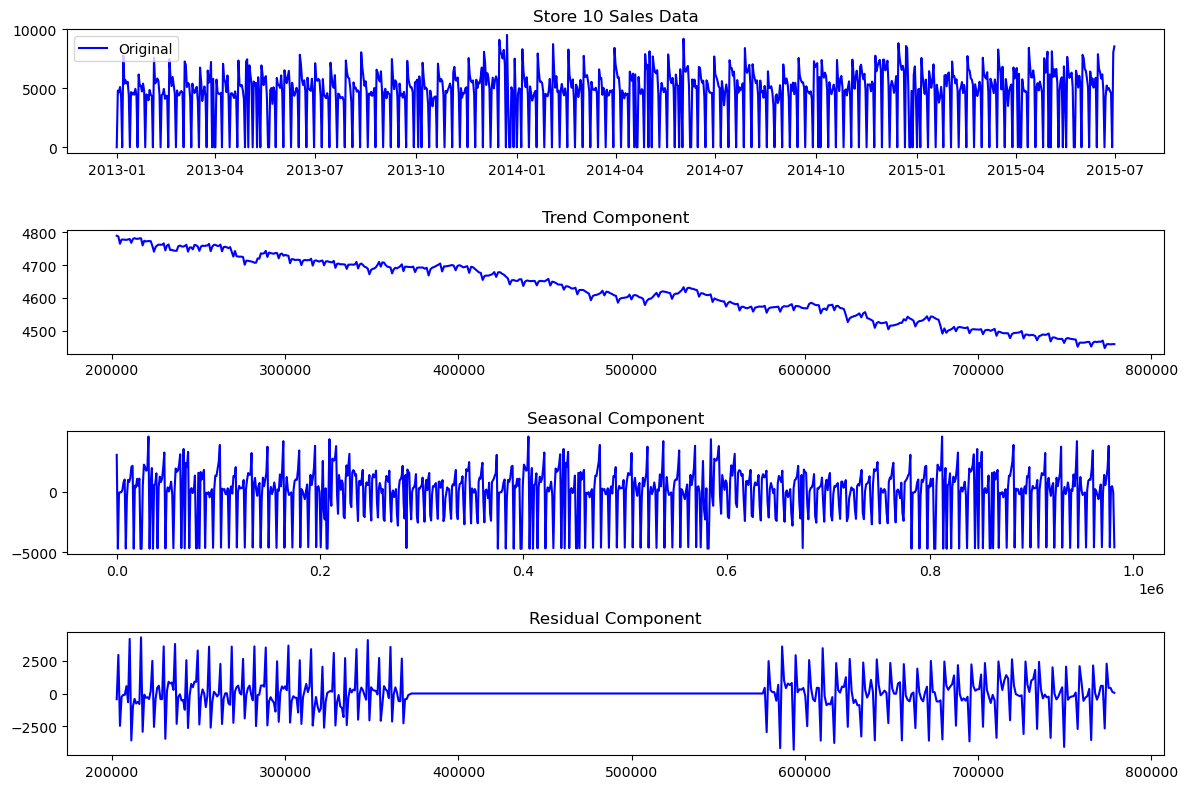

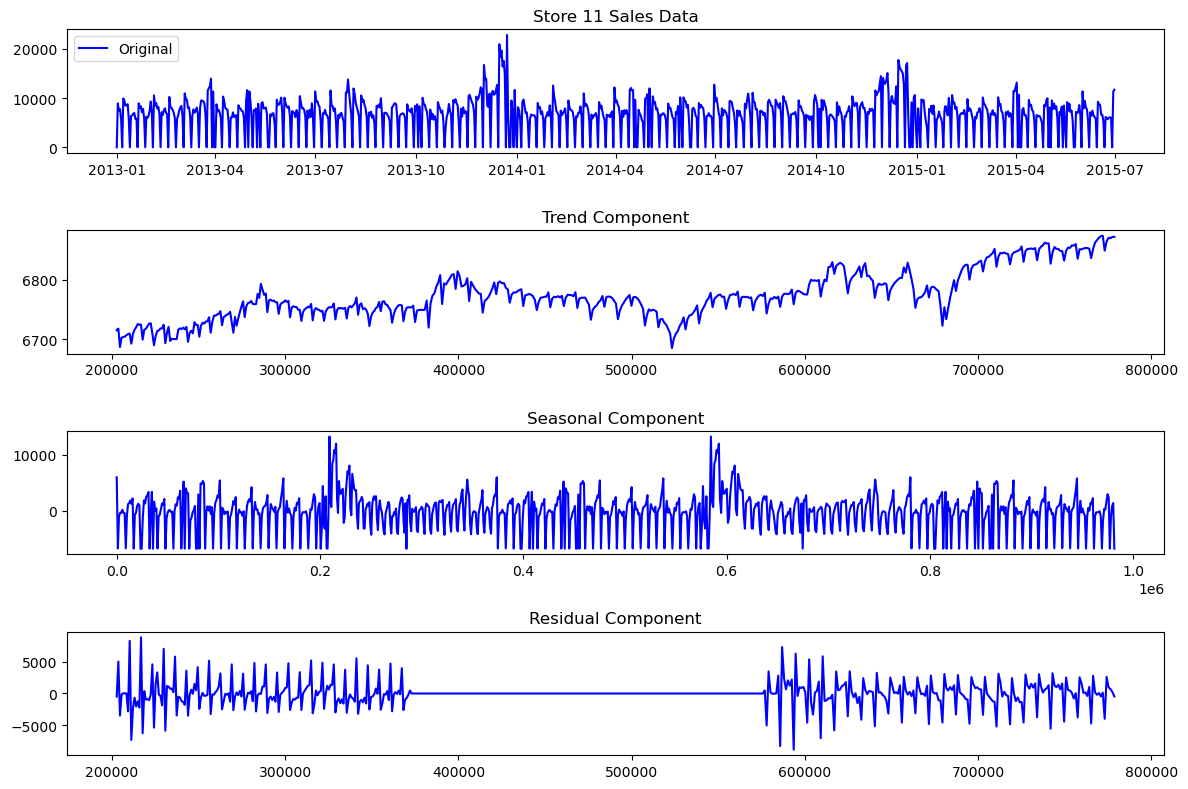

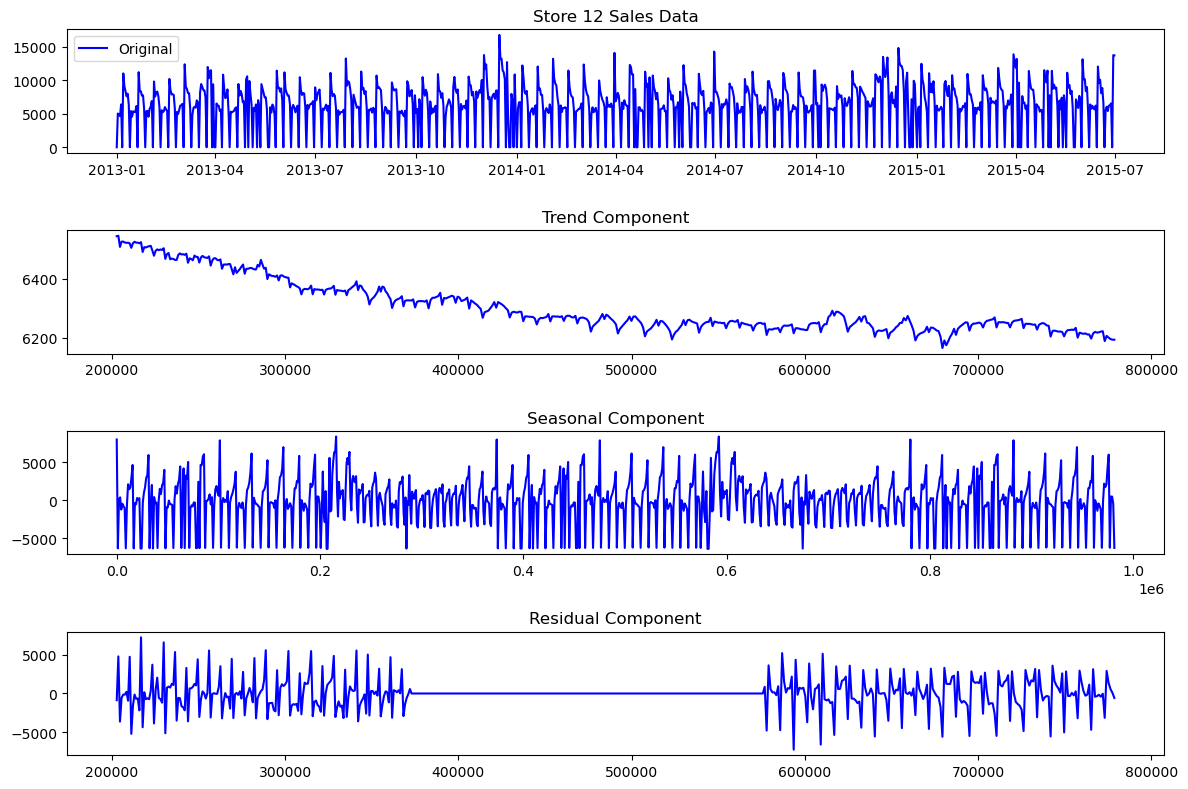

ValueError: x must have 2 complete cycles requires 730 observations. x only has 727 observation(s)

In [27]:
# Sorting the retail_data_encoded by date
retail_data_encoded.sort_values(by='Date', inplace=True)

# Group the data by store
grouped_data = retail_data_encoded.groupby('Store')

# Function to decompose and visualize time series
def decompose_and_visualize(store_id, store_data):
# Decomposing the time series
    result = seasonal_decompose(store_data['Sales'], model='additive', period=365)

# Plot of decomposed components
    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.title(f'Store {store_id} Sales Data')
    plt.plot(store_data['Date'], store_data['Sales'], label='Original', color='blue')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.title('Trend Component')
    plt.plot(result.trend, color='blue')
    plt.subplot(413)
    plt.title('Seasonal Component')
    plt.plot(result.seasonal, color='blue')
    plt.subplot(414)
    plt.title('Residual Component')
    plt.plot(result.resid, color='blue')
    plt.tight_layout()
    plt.show()

# Iterate through each store and perform time-series analysis
for store_id, store_data in grouped_data:
    decompose_and_visualize(store_id, store_data)

In [30]:
# Scale the data to [0, 1]
scaler = MinMaxScaler()
retail_data_features=retail_data_encoded.drop(['Date'], axis=1)

scaled_data = scaler.fit_transform(retail_data_features)

In [33]:
# Create sequences for LSTM
def create_sequences(retail_data_features, seq_length):
    X, y = [], []
    for i in range(len(retail_data_features) - seq_length):
        X.append(retail_data_features[i:i + seq_length])
        y.append(retail_data_features[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Define sequence length
X, y = create_sequences(scaled_data, seq_length)
retail_data_column=retail_data_features.drop(['Sales'], axis=1)
num_features = len(retail_data_column.columns)
# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, num_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

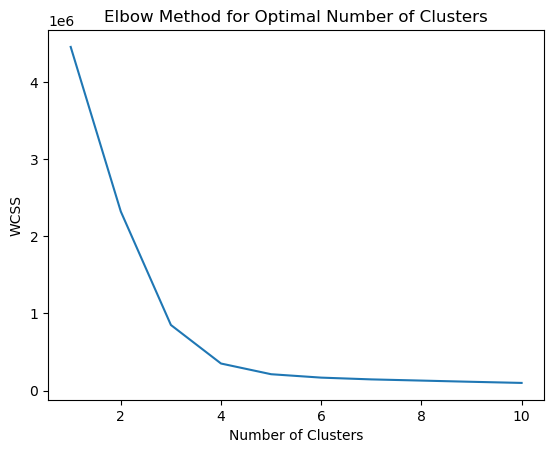

In [38]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(retail_data_column)

# Use PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):  # Try a range of cluster numbers
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(reduced_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Build ANN model
model = Sequential()
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  
batch_size = [32, 64, 128]
epochs = [50, 100, 200]


In [43]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='mean_squared_error')


In [ ]:
# Experimenting with different combinations of epochs and batch sizes
epochs_list = [50, 100, 200]
batch_size_list = [32, 64, 128]

best_rmse = float('inf')  
best_epochs = None
best_batch_size = None

for chosen_epochs in epochs_list:
    for chosen_batch_size in batch_size_list:
        model = Sequential()
        model.add(Dense(128, input_dim=num_features, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1))  # Output layer

        # Compile the model with your chosen hyperparameters
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        history = model.fit(x_train, y_train, epochs=chosen_epochs, batch_size=chosen_batch_size, validation_data=(x_test, y_test))

        # Calculate RMSE
        y_pred = model.predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        # Check if this combination of hyperparameters resulted in a better RMSE
        if rmse < best_rmse:
            best_rmse = rmse
            best_epochs = chosen_epochs
            best_batch_size = chosen_batch_size

# Print the best hyperparameters and RMSE
print(f'Best Epochs: {best_epochs}')
print(f'Best Batch Size: {best_batch_size}')
print(f'Best RMSE: {best_rmse}')


In [ ]:
#Implement Dropout in ANN:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, input_dim=num_features, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout with a rate of 0.2
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer


In [ ]:
 # Compare Model Performance:
# Train and evaluate ANN model with dropout
# ...

# Train and evaluate traditional ML models (e.g., Linear Regression, Random Forest)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Initialize and train your ML models
linear_regression = LinearRegression()
random_forest = RandomForestRegressor()

linear_regression.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate the ML models
y_pred_linear = linear_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f'RMSE for Linear Regression: {rmse_linear}')
print(f'RMSE for Random Forest: {rmse_rf}')
